<a href="https://colab.research.google.com/github/RishikaGhosh/research-paper/blob/master/BanglaLekha_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip drive/MyDrive/BanglaLekha_Isolated_modified> /dev/null

warning [drive/MyDrive/BanglaLekha_Isolated_modified.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [drive/MyDrive/BanglaLekha_Isolated_modified.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
error:  expected central file header signature not found (file #99001).
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)


In [3]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 41.6 MB/s eta 0:00:00


In [4]:
!pip install tensorflow-addons --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import os
import cv2
from PIL import ImageFile,Image
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, MaxPooling2D, Reshape, LSTM
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [6]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
data_set = "BanglaLekha_Isolated_modified/"
dimensions = (28, 28)

In [ ]:
def process_images(folder):

    classes = [os.path.join(folder, d) for d in sorted(os.listdir(folder))]  # get list of all sub-folders in folder
    img_cnt = 0
    i=0
    for class_x in classes:
        i=i+1
        if os.path.isdir(class_x):

            # get paths to all the images in this folder
            images = [os.path.join(class_x, i) for i in sorted(os.listdir(class_x)) if i != '.DS_Store']
            print(len(images))
            if folder == "Dataset/Test" and i==1:
                images = images[:-1]

            for image in images:

                img_cnt = img_cnt + 1

                if(img_cnt % 1000 == 0):                # show progress
                    print("Processed %s images" % str(img_cnt))

                im = Image.open(image)
                print(image)
                im = im.resize(dimensions)   # resize image according to dimensions set

                image_array = np.array(im)
                otsu_threshold, image_result = cv2.threshold(image_array, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                im = Image.fromarray(image_result)

                im.save(image)
    print("Finished processing images, images found = ")
    print(img_cnt)
process_images(data_set)

In [10]:
import splitfolders

In [11]:
splitfolders.ratio("/content/BanglaLekha_Isolated_modified/", output="BanglaLekha_dataset",
    seed=1337, ratio=(.7,.1,.2), group_prefix=None, move=False)

Copying files: 98950 files [00:10, 9047.35 files/s]


In [12]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1), padding = "same", input_shape = (28, 28, 1)))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1,1), padding = "same"))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1,1), padding = "same"))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
classifier.add(Dropout(.2))

classifier.add(Reshape((3,3*128),input_shape=(3,3,128)))
classifier.add(LSTM(128, return_sequences=True))

classifier.add(Flatten())

classifier.add(Dense(units = 128))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(Dropout(.2))

classifier.add(Dense(units = 64))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(Dropout(.2))

classifier.add(Dense(units = 50, activation = 'softmax'))

opt=tf.keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95)              
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        1

In [14]:
train_folder = "/content/BanglaLekha_dataset/train"
val_folder = "/content/BanglaLekha_dataset/val"
test_folder = "/content/BanglaLekha_dataset/test"

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [16]:
Image.LOAD_TRUNCATED_IMAGES = True


train_datagen = ImageDataGenerator(shear_range = .2, rotation_range = 25)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_set = train_datagen.flow_from_directory(train_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")
val_set = val_datagen.flow_from_directory(val_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")
test_set = test_datagen.flow_from_directory(test_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")

Found 69244 images belonging to 50 classes.
Found 9877 images belonging to 50 classes.
Found 19829 images belonging to 50 classes.


In [17]:
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 200,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights1.h5')

Epoch 1/200
2164/2164 [==============================] - 55s 19ms/step - loss: 3.1990 - accuracy: 0.1586 - val_loss: 1.9817 - val_accuracy: 0.4591
Epoch 2/200
2164/2164 [==============================] - 39s 18ms/step - loss: 2.0808 - accuracy: 0.3924 - val_loss: 1.2383 - val_accuracy: 0.6551
Epoch 3/200
2164/2164 [==============================] - 40s 18ms/step - loss: 1.5657 - accuracy: 0.5286 - val_loss: 0.9379 - val_accuracy: 0.7336
Epoch 4/200
2164/2164 [==============================] - 40s 18ms/step - loss: 1.2871 - accuracy: 0.6095 - val_loss: 0.7772 - val_accuracy: 0.7762
Epoch 5/200
2164/2164 [==============================] - 39s 18ms/step - loss: 1.1094 - accuracy: 0.6659 - val_loss: 0.6647 - val_accuracy: 0.8109
Epoch 6/200
2164/2164 [==============================] - 39s 18ms/step - loss: 0.9888 - accuracy: 0.7048 - val_loss: 0.6153 - val_accuracy: 0.8210
Epoch 7/200
2164/2164 [==============================] - 39s 18ms/step - loss: 0.8947 - accuracy: 0.7337 - val_loss: 0

In [26]:
classifier.evaluate(test_set)

620/620 [==============================] - 5s 8ms/step - loss: 0.3392 - accuracy: 0.9336


[0.3391944169998169, 0.9336325526237488]

In [28]:
!unzip drive/MyDrive/cmaterDB_dataset> /dev/null

replace Dataset/main/train/172/bcc000000.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [29]:
train_folder = "Dataset/Train" 
test_folder = "Dataset/Test"
dimensions = (28, 28)

In [31]:
train_folder = "Dataset/main/train" 
test_folder = "Dataset/main/val"
dimensions = (28, 28)

In [ ]:
def process_images(folder):

    classes = [os.path.join(folder, d) for d in sorted(os.listdir(folder))]  # get list of all sub-folders in folder
    img_cnt = 0
    i=0
    for class_x in classes:
        i=i+1
        if os.path.isdir(class_x):

            # get paths to all the images in this folder
            images = [os.path.join(class_x, i) for i in sorted(os.listdir(class_x)) if i != '.DS_Store']
            print(len(images))
            if folder == "Dataset/Test" and i==1:
                images = images[:-1]

            for image in images:

                img_cnt = img_cnt + 1

                if(img_cnt % 1000 == 0):                # show progress
                    print("Processed %s images" % str(img_cnt))

                im = Image.open(image)
                print(image)
                im = im.resize(dimensions)   # resize image according to dimensions set

                im = im.convert('L')

                image_array = np.array(im)
                otsu_threshold, image_result = cv2.threshold(image_array, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                im = Image.fromarray(image_result)

                im.save(image)
    print("Finished processing images, images found = ")
    print(img_cnt)
process_images(train_folder)
process_images(test_folder)

In [33]:
Image.LOAD_TRUNCATED_IMAGES = True


train_datagen_cm = ImageDataGenerator(shear_range = .2, rotation_range = 25)
val_datagen_cm = ImageDataGenerator()
test_datagen_cm = ImageDataGenerator()

train_set_cm = train_datagen_cm.flow_from_directory(train_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")
val_set_cm = val_datagen_cm.flow_from_directory(val_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")
test_set_cm = test_datagen_cm.flow_from_directory(test_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")

Found 10800 images belonging to 50 classes.
Found 9877 images belonging to 50 classes.
Found 1200 images belonging to 50 classes.


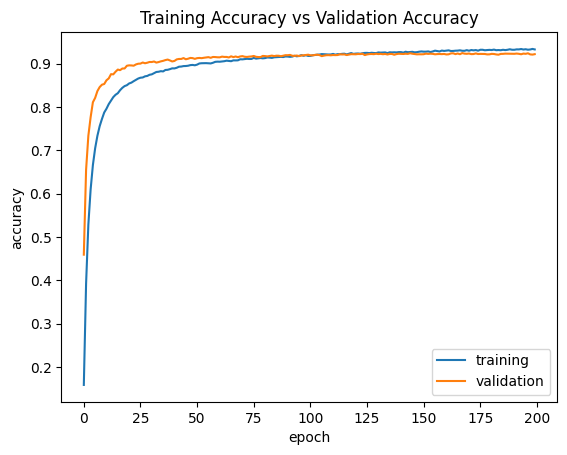

In [39]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

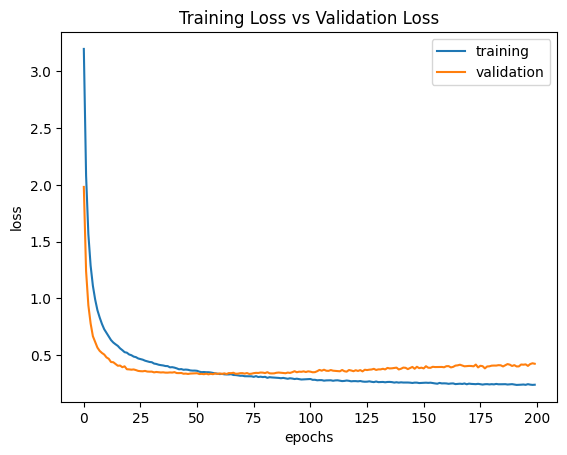

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [41]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

In [44]:
print(classifier)

In [46]:
classifier.save('banglalekhaCLassifier')